## Predicting wine quality

by Kittipong Wongwipasamitkun, Nicole Tu, Sho Inagaki
2023/11/18

In [1]:
import numpy as np
import pandas as pd
import requests
import zipfile
import altair as alt
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Summary

We tried to make the classification model using the Polynomial Regression with Ridge Regularization algorithm with Random Search Hyperparameters which can predict the portugal white wine quality rating (on scale 0-10) through the physicochemical properties of the test wine. The model has trained on the portugal white wine data set with 4898 observations. In the conclusion, the model performance is not quite good enough both on training data and on an unseen test data set with the test score at around 0.32 with the average train $R^2$ at 0.35 and the average test $R^2$ at 0.27 also with high root MSE and MSE (Mean Squared Error).

The reason we suspect the model cannot predict well may caused by 


On the 171 test data cases, it correctly predicted 168. It incorrectly predicted 3 cases, which were all false positives - predicting that a tumour is malignant when in fact it is benign. These kind of incorrect predictions is not as harmful as a false negative in our context. Although they could theoretically cause the patient to undergo unnecessary treatment if the model is used as a decision tool, it is likely that the model is used for initial screening and that there will be a follow up appointment and further testing until treatment commences. As such, we believe this model is at, or close to, the performance required for it to have clinical utility, although further research to improve the model performance and understand the characteristics of incorrectly predicted patients would still be useful.

# Introduction

Referring to WSET (the Wine & Spirits Education Trust), Wine tasting notes can be described by Systematic Approach to Tasting (SAT) (https://www.wsetglobal.com/media/13271/wset_l4wines_sat_en_aug2023.pdf) , which is consisted of 
1. Appearance (colour, clarity, intensity, and other observations)
2. Nose (condition, intensity, aroma characteristics, aroma development)
3. Palate (sweetness, acidity, tannin, alcohol, body, flavour intensity, flavour characteristics, finish, and other observations)
4. Conclusion (quality, readiness for drinking and potential for ageing).
   
The wine quality which is in the conclusion part, consists mainly on Balance, Length, Intensity and Complexity (BLIC). The result of these qualities, all came from the chemical components in the wine. Subsequently, nowadays, the quality of wine can be determined roughly from the physicochemical components on the wine.
 
As the physicochemical properties have been related to the wine quality, so we aim to create a machine learning algorithm to predict the quality of wine from the measurement of physicochemical values. Answering this question can help both customers and winemakers to screen or adjust or make decision to the prior wine quality rating from the model according to its physicochemical values.

This machine learning algorithm will aim to study only the Portugal wine (separate between red and white) to reduce biased from the types of wine and the origin sources of wine as the start point to assess the quality of wine via its physicochemical features.


# Methods

## Data
The two datasets  used in this project are related to red and white vinho verde wine samples from the north of Portugal created By P. Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, J. Reis. 2009. The two datasets were sourced from  website for downloading these datasets is the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/186/wine+quality). In addition, these datasets stored the physicochemical properties data on wines and the quality rating to compare and make the quality prediction model.

## Analysis
As we have many variables to concern and most of them have correlation to the target quality, which it is best to not drop these correlated features. 
Also in the real world with multiple explanatory variables, it is less likely for model to have a linear pattern, and we believe that polynomial regression can be a more realistic model to predict wine quality. The reason we use polynomial regression rather than a linear regression is that

Therefore, we choose the **Polynomial regression with ridge regularization** to reduce the effect of multicolinearity, and use **Random search** to optimize the hyperparameters. Data was partitioned by 70% for the training set and 30% for the test set. 



Now lets examine the distribution of the features to decide how to preprocess them:

The k-nearest neighbors (k-nn) algorithm was used to build a classification model to predict whether a tumour mass was benign or malignant (found in the class column of the data set). All variables included in the original data set, with the exception of the standard error of fractal dimension, smoothness, symmetry and texture were used to fit the model.

The hyperparameter $K$ was chosen using 30-fold cross validation with the F2 score as the classification metric. Beta was chosen to be set to 2 for the F2 score to increase the weight on recall during fitting because the application is cancer screening and false negatives are very undesirable in such an application. All variables were standardized just prior to model fitting. The Python programming language (Van Rossum and Drake 2009) and the following Python packages were used to perform the analysis: requests(Reitz 2011), zipfile (Van Rossum and Drake 2009), numpy(Harris et al. 2020), Pandas (McKinney 2010), altair (VanderPlas, 2018), scikit-learn (Pedregosa et al. 2011). The code used to perform the analysis and create this report can be found here: https://github.com/ttimbers/breast_cancer_predictor_py.


# Results & Discussion

We tried to find out whether each of the physicochemical properties might be useful to predict the wine quality rating. We plotted the distributions of each physicochemical properties to see ....


To look at whether each of the physicochemical properties might be useful to predict the wine quality rating, we plotted the distributions of each predictor from the training data set and coloured the distribution by class (benign: blue and malignant: orange). In doing this we see that class distributions for all of the mean and max predictors for all the measurements overlap somewhat, but do show quite a difference in their centres and spreads. This is less so for the standard error (se) predictors. In particular, the standard errors of fractal dimension, smoothness, symmetry and texture look very similar in both the distribution centre and spread. Thus, we choose to omit these from our model.

In [3]:
# pre-process data (e.g., drop na, check data info)
# read white wine data
white_wine = pd.read_csv('../data/Raw/winequality-white.csv', sep=';')
white_wine.dropna(inplace=True)
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
np.random.seed(522)
# 1. split train and test data as df, save to folder. 
white_train, white_test = train_test_split(white_wine, train_size=0.70, random_state=123)
white_train.to_csv("../data/Processed/white_train.csv")
white_test.to_csv("../data/Processed/white_test.csv")

In [5]:
# 2. EDA by visualization

white_train.head()

# Visualize correlation
white_train.corr().style.background_gradient()

Figure 1. Correlation matrix indicating potential multicolinarity among features.

From figure 1, it turns out that among explanatory features, density and residual sugar are highly correlated (0.844); density and total sulfur dioxide are highly correlated(0.527); total sulfur dioxide and free sulfur dioxide are highly correlated (0.620).

Since the free SO2 is the active, unbound form that contributes to antioxidant and antimicrobial properties, and the Total SO2 includes both free and bound forms, providing an overall measure of sulfur dioxide content in the win, we drop the free sulfur dioxide from the data. 
.

In [6]:
# drop redundant feature
white_train = white_train.drop(columns=["free sulfur dioxide"])

Let's examine the relationship between the three highly correlated features by scatter plot matrix, figure 2, as shown below:

In [7]:
alt.data_transformers.enable('vegafusion')  # simplify working with large datasets

alt.Chart(white_train).mark_point(opacity=0.3, size=10).encode(
     alt.X(alt.repeat('row'), type='quantitative'),         #encodes the x-axis and y-axis as quantitative values. The 'repeat' function is used to specify that the x-axis should repeat for each row and the y-axis should repeat for each column.
     alt.Y(alt.repeat('column'), type='quantitative')
).properties(
    width=100,
    height=100
).repeat(
    column=['density', 'residual sugar', 'total sulfur dioxide', 'quality'],
    row=['density', 'residual sugar', 'total sulfur dioxide','quality'])

alt.RepeatChart(...)

From feature 2, since both residual sugar, density, and total sulfur dioxide have correlation with the target quality, it is not a good idea to drop these correlated features.  Instead, we pick the **polynomial regression with ridge regularization** to reduce multicolinearity, and use **Random search** to optimize the hyperparamters.

The reason we use polynomial regression rather than a linear regression is that in the real world scenario with multiple explanatory variables, it is less likely for model to have a linear pattern, and we believe that polynomial regression can be a more realistic model to predict wine quality.

Now lets examine the distribution of the features to decide how to preprocess them:

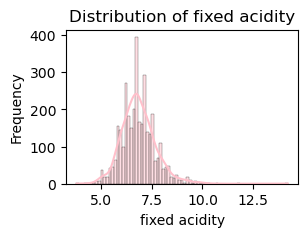

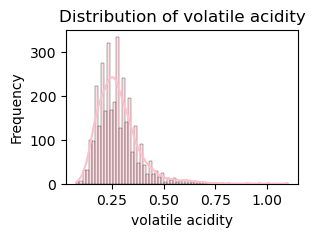

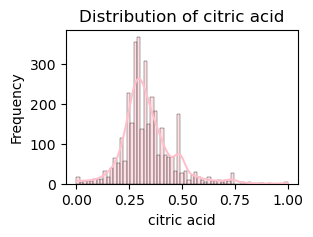

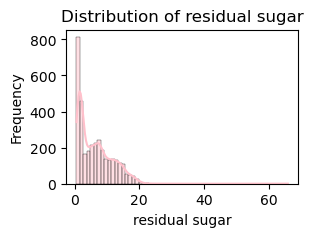

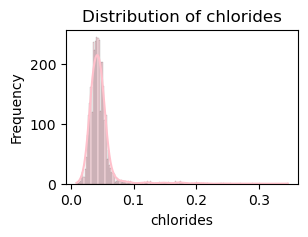

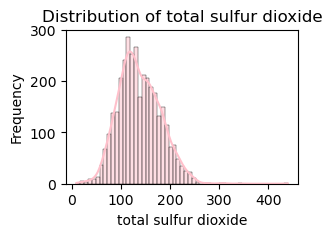

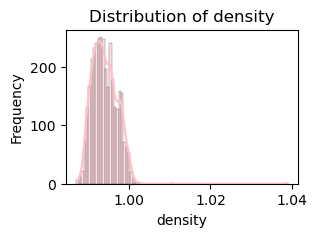

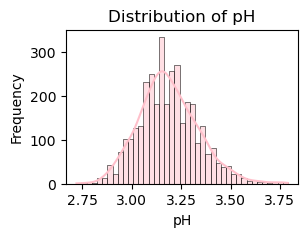

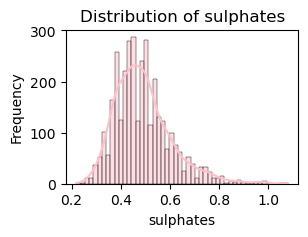

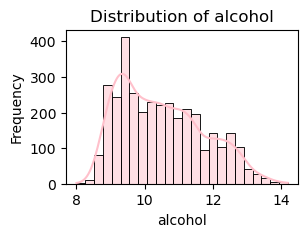

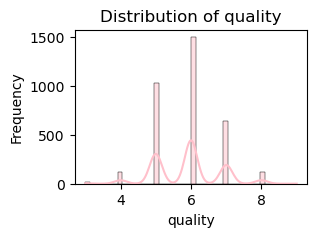

In [8]:
# Create a histogram for each column
for column in white_train.columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(white_train[column], kde=True, color='pink')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Figure 3. Distribution of features in training set.

From figure 3, most of the features follow an approximately normal distribution, while the residual sugar is slightly skewed. Given the distribution of the features, we preprocess the data by **standardization and imputation with median value**.


In [9]:
x_train_w, y_train_w = white_train.drop(columns=["quality"]), white_train["quality"]
x_test_w, y_test_w = white_test.drop(columns=["quality"]), white_test["quality"]


In [10]:
# Polinomial regression
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
numeric_feats = x_train_w.columns.tolist()

# Create a ColumnTransformer
ct = make_column_transformer(
    (numeric_transformer, numeric_feats),  # Apply numeric transformer to numeric_feats
    (PolynomialFeatures(), numeric_feats) # Apply poly_transformer to numeric_feats
  )

Pipe_poly=make_pipeline(ct, Ridge())

In [11]:
# Hyperparameter Tuning by Random Search
param_dist = { #can pass either a distribution or list of values for random search
    "columntransformer__polynomialfeatures__degree":list(range(1, 8)), 
    "ridge__alpha": np.logspace(-2, 2, 15)}

random_search = RandomizedSearchCV(Pipe_poly, param_distributions = param_dist, n_iter=15,  
n_jobs=-1, return_train_score=True)


In [12]:
# fit the random search with training data 
random_search.fit(x_train_w, y_train_w)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['fixed '
                                                                                'acidity',
                                                                                'volatile '
                                                                                'acidity',
                                                                                'citric '
                                                                                'acid',
                                                                                'residual '
                                                                                'sugar',
                                                                                'chlorides',
                                                                                'total '
                                                                                'sulfur '
                                                                                'dioxide',
                                                                                'density',
                                                                                'pH',
                                                                                'sulphates',...
                   param_distributions={'columntransformer__polynomialfeatures__degree': [1,
                                                                                          2,
                                                                                          3,
                                                                                          4,
                                                                                          5,
                                                                                          6,
                                                                                          7],
                                        'ridge__alpha': array([1.00000000e-02, 1.93069773e-02, 3.72759372e-02, 7.19685673e-02,
       1.38949549e-01, 2.68269580e-01, 5.17947468e-01, 1.00000000e+00,
       1.93069773e+00, 3.72759372e+00, 7.19685673e+00, 1.38949549e+01,
       2.68269580e+01, 5.17947468e+01, 1.00000000e+02])},
                   return_train_score=True)

In [13]:
random_search.best_params_

{'ridge__alpha': 0.13894954943731375,
 'columntransformer__polynomialfeatures__degree': 2}

In [14]:
best_model = random_search.best_estimator_ # Get the best model based on optimization

In [15]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

scoring = {
    "r2": "r2",
    "sklearn MAPE": "neg_mean_absolute_percentage_error",
    "neg_root_mean_square_error": "neg_root_mean_squared_error",
    "neg_mean_squared_error": "neg_mean_squared_error"}

score_table=pd.DataFrame(cross_validate(best_model, x_train_w, y_train_w, return_train_score=True, scoring=scoring)).T
score_table

0         1         2         3  \
fit_time                          0.023283  0.029494  0.048072  0.034353   
score_time                        0.016675  0.010557  0.009947  0.012013   
test_r2                           0.310275  0.352294  0.342595  0.062560   
train_r2                          0.357499  0.347234  0.346548  0.354813   
test_sklearn MAPE                -0.097457 -0.103011 -0.097762 -0.106176   
train_sklearn MAPE               -0.099286 -0.097894 -0.099527 -0.098261   
test_neg_root_mean_square_error  -0.722673 -0.744341 -0.722322 -0.860427   
train_neg_root_mean_square_error -0.721092 -0.715690 -0.723061 -0.718781   
test_neg_mean_squared_error      -0.522256 -0.554044 -0.521749 -0.740335   
train_neg_mean_squared_error     -0.519973 -0.512212 -0.522818 -0.516646   

                                         4  
fit_time                          0.020914  
score_time                        0.000000  
test_r2                           0.286411  
train_r2                          0.363308  
test_sklearn MAPE                -0.102596  
train_sklearn MAPE               -0.097806  
test_neg_root_mean_square_error  -0.753973  
train_neg_root_mean_square_error -0.713437  
test_neg_mean_squared_error      -0.568475  
train_neg_mean_squared_error     -0.508992

In [16]:
score_table.mean(axis=1).to_frame()

0
fit_time                          0.031223
score_time                        0.009839
test_r2                           0.270827
train_r2                          0.353880
test_sklearn MAPE                -0.101400
train_sklearn MAPE               -0.098555
test_neg_root_mean_square_error  -0.760747
train_neg_root_mean_square_error -0.718412
test_neg_mean_squared_error      -0.581372
train_neg_mean_squared_error     -0.516128

In [17]:
best_model.score(x_test_w, y_test_w)  # Get the scores using the best hyperparameter values found by grid search 

0.3198310306347695

While the performance of this model is likely already useful as a screening tool in a clinical setting, there are several directions that could be explored for to improve it further. First, we could look closely at the 3 misclassified observations and compare them to several observations that were classified correctly (from both classes). The goal of this would be to see which feature(s) may be driving the misclassification and explore whether any feature engineering could be used to help the model better predict on observations that it currently is making mistakes on. Additionally, we would try seeing whether we can get improved predictions using other classifiers. One classifier we might try is random forest forest because it automatically allows for feature interaction, where k-nn does not. Finally, we also might improve the usability of the model in the clinic if we output and report the probability estimates for predictions. If we cannot prevent misclassifications through the approaches suggested above, at least reporting a probability estimates for predictions would allow the clinician to know how confident the model was in its prediction. Thus the clinician may then have the ability to perform additional diagnostic assays if the probability estimates for prediction of a given tumour class is not very high.

# References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems. DOI: https://doi.org/10.24432/C56S3T

Dua, Dheeru, and Casey Graff. 2019. “UCI Machine Learning Repository.” University of California, Irvine, School of Information; Computer Sciences. https://archive.ics.uci.edu/dataset/186/wine+quality.

WSET Global. (n.d.). WSET systematic approach to tasting (SAT). Retrieved from https://www.wsetglobal.com/knowledge-centre/wset-systematic-approach-to-tasting-sat/ed:
Mystery Tasting. (n.d.). WSET SAT explained. Retrieved from https://www.mysterytasting.com/wset-sat-explainace.

MDS-2023-24. (2023). MDS Lecture Notes on GitHub repository. Retrieved from https://github.ubc.ca/MDS-2023-24.

Fan, J. (1996). Local Polynomial Modelling and Its Applications: From linear regression to nonlinear regression. Monographs on Statistics and Applied Probability. Chapman & Hall/CRC. ISBN 978-0-412-98321-4.

Hoerl, A. E. (1962). Application of Ridge Analysis to Regression Problems. Chemical Engineering Progress, 58(3), 54–59
.
van Wieringen, W. (2021, May 31). Lecture notes on ridge regression. arXiv:1509.09169 [stat.ME
].
Tikhonov, A. N., & Arsenin, V. Y. (1977). Solution of Ill-posed Problems. Washington: Winston & Sons. ISBN 0-470-99124-0.